# Homework 1

Name: Kavana Manvi Krishnamuthy

ID: 2158984

## Part 1 – Image Scaling by Pixel Replication

In [4]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.10.0


In [5]:
image1 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW2/Image1.jpeg")

In [6]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

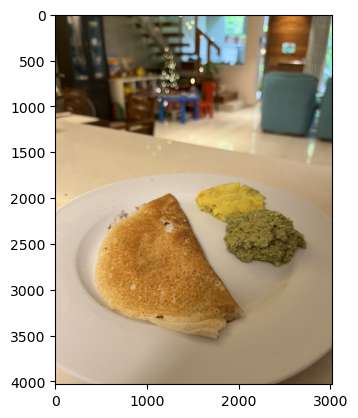

In [7]:
# Display the image
plt.imshow(image1_rgb)

Data Source: I clicked a picture of "DOSA" prepared by my mom last december when I went to India for the holidays.It's a famous south India breakfast paired with spicy sauce called chutney and mashed potatoes.

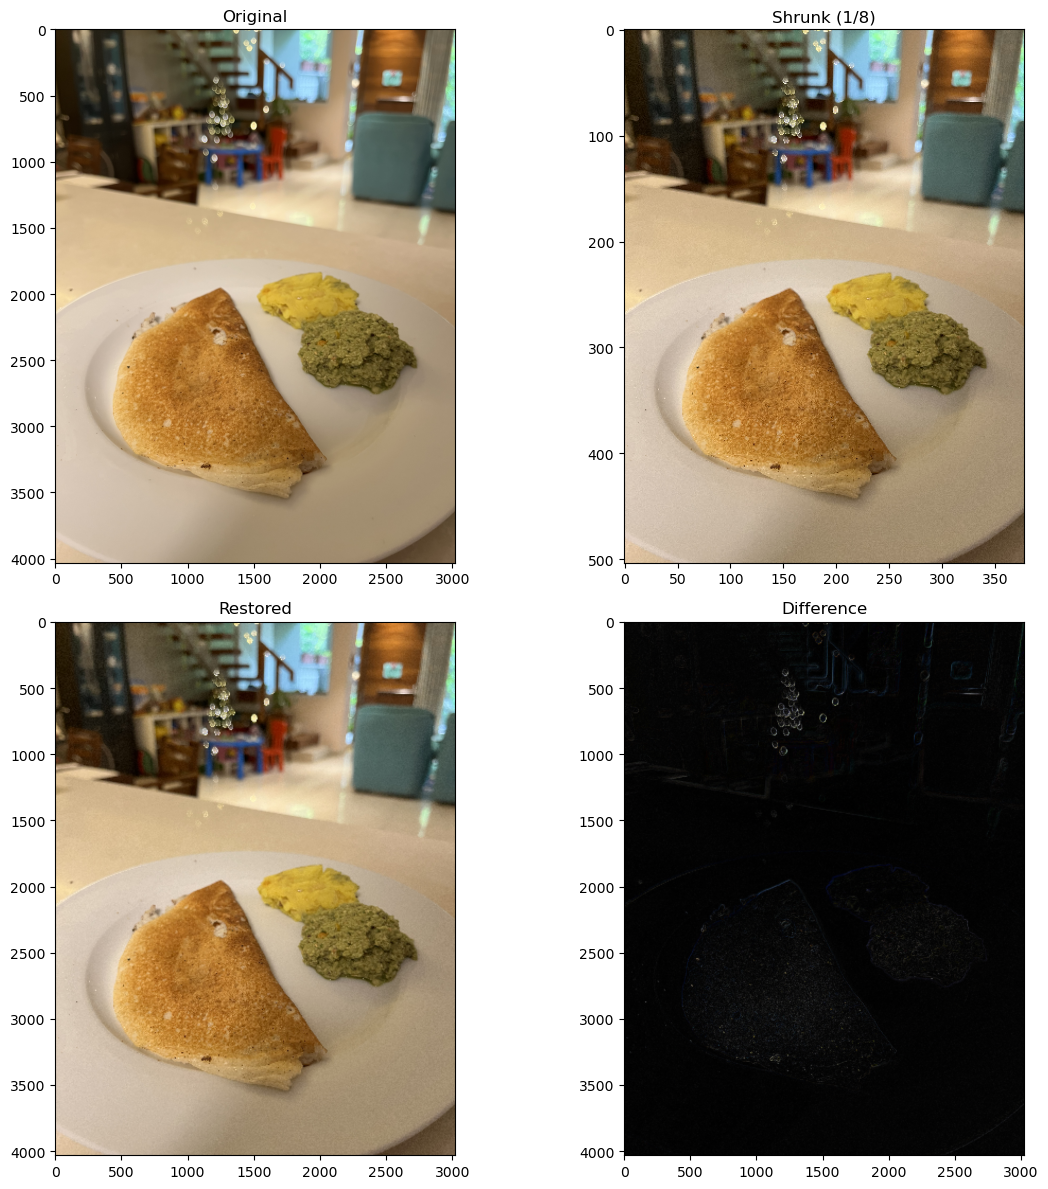

In [9]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def pixel_decimation_replication(image, factor):
    if factor == 0:
        return image
    
    height, width = image.shape[:2]
    
    if factor > 0:
        # Zoom in
        zoom_height= height * factor
        zoom_width = width * factor
        zoomed_image = np.zeros((zoom_height, zoom_width, 3), dtype=np.uint8)
        for i in range(zoom_height):
            for j in range(zoom_width):
                zoomed_image[i, j] = image[i // factor, j // factor]
        return zoomed_image
    else:
        # Shrink
        factor = abs(factor)
        shrunk_image = image[::factor, ::factor]
        return shrunk_image
    
    

def process_image(image_input, shrink_factor, zoom_factor):
    if isinstance(image_input, np.ndarray):
        original = cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB)
    else:
        raise ValueError("Input must be a NumPy array loaded with OpenCV")
    
    
    shrunk = pixel_decimation_replication(original, -shrink_factor)
    
    restored = pixel_decimation_replication(shrunk, zoom_factor)
    
    difference = np.abs(original.astype(int) - restored.astype(int)).astype(np.uint8)
    
   
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0, 0].imshow(original)
    axs[0, 0].set_title('Original')
    axs[0, 1].imshow(shrunk)
    axs[0, 1].set_title(f'Shrunk (1/{shrink_factor})')
    axs[1, 0].imshow(restored)
    axs[1, 0].set_title('Restored')
    axs[1, 1].imshow(difference)
    axs[1, 1].set_title('Difference')
    plt.tight_layout()
    plt.show()

process_image(image1, 8, 8)


The original image has dimension of 4000x3000. When shrunk the image has dimension of 500x350 which is 1/8th the original dimension. Then it is zoomed back to original dimension. Both the shrunk and zoomed- restored image is not as clear as the original. The diffrence between the 2 is shoown in the 4th picture.

## Part 2 – Basic Gray Level Transformations

1) Load your input image.
2) If the image is not grayscale already, your code must convert it to grayscale.
3) If your image is stored as an array of bytes or integer values, convert it to floating point values.
4) If range of values in your image is from 0 to 255, convert them to values between 0.0 to 1.0 by
dividing them by 255.0 (this will not work well if you skip the previous step!)
5) Create an inverted image, where for every pixel: [N𝑒𝑤 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦] = 1.0 – [𝑂𝑙𝑑 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦]
6) Use the power function to play with the contrast of the image.
a. Pick a total of 4 values: 2 values between 0.25 to 0.99, and 2 values between 1.1 to 4.0.
b. For each of these values, create a copy of the image where:
i. [𝑁𝑒𝑤 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦] = 𝑝𝑜𝑤𝑒𝑟( [𝑂𝑙𝑑 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦], [𝑦𝑜𝑢𝑟 𝑣𝑎𝑙𝑢𝑒])

In [13]:
#load image
image2 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW2/Image2.jpeg")

In [14]:
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [15]:
#convert to gray scale
if len(image2_rgb.shape) == 3:
    image2_grey = cv2.cvtColor(image2_rgb, cv2.COLOR_BGR2GRAY)
else:
    image2_grey = image2

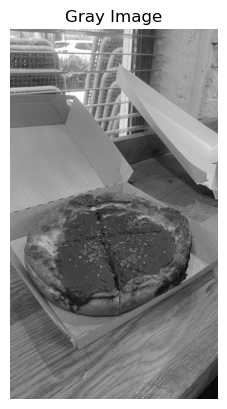

In [16]:
plt.imshow(image2_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

Data source: I clicked a picture of Deep dish pizza from beatrix in Chicago.

In [18]:
# 3) Convert to floating point values
image_float = image2_grey.astype(np.float32) / 255.0

In [19]:
def invert_image(image):
    # Create inverted image
    inverted_image = 1.0 - image
    return inverted_image

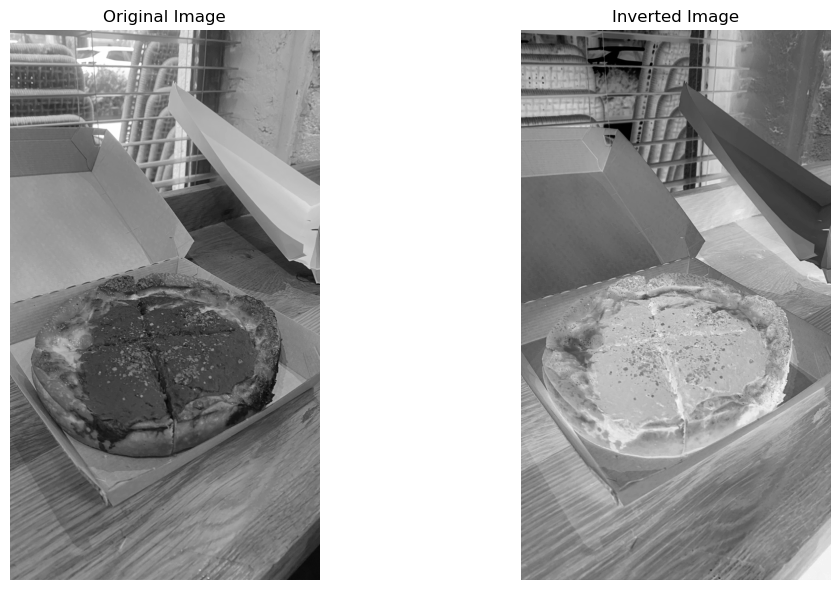

In [20]:
inverted_image = invert_image(image_float)

# Display the original and inverted images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image_float, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(inverted_image, cmap='gray')
ax2.set_title('Inverted Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

Result: The inverted image is a exact negative, where ever there is blackness in original picture, there is white in 2nd inverted picture

In [22]:
def apply_power_function(image, power):
    return np.power(image, power)

In [23]:
power_levels = [0.4, 0.8,2.4 , 3.4]

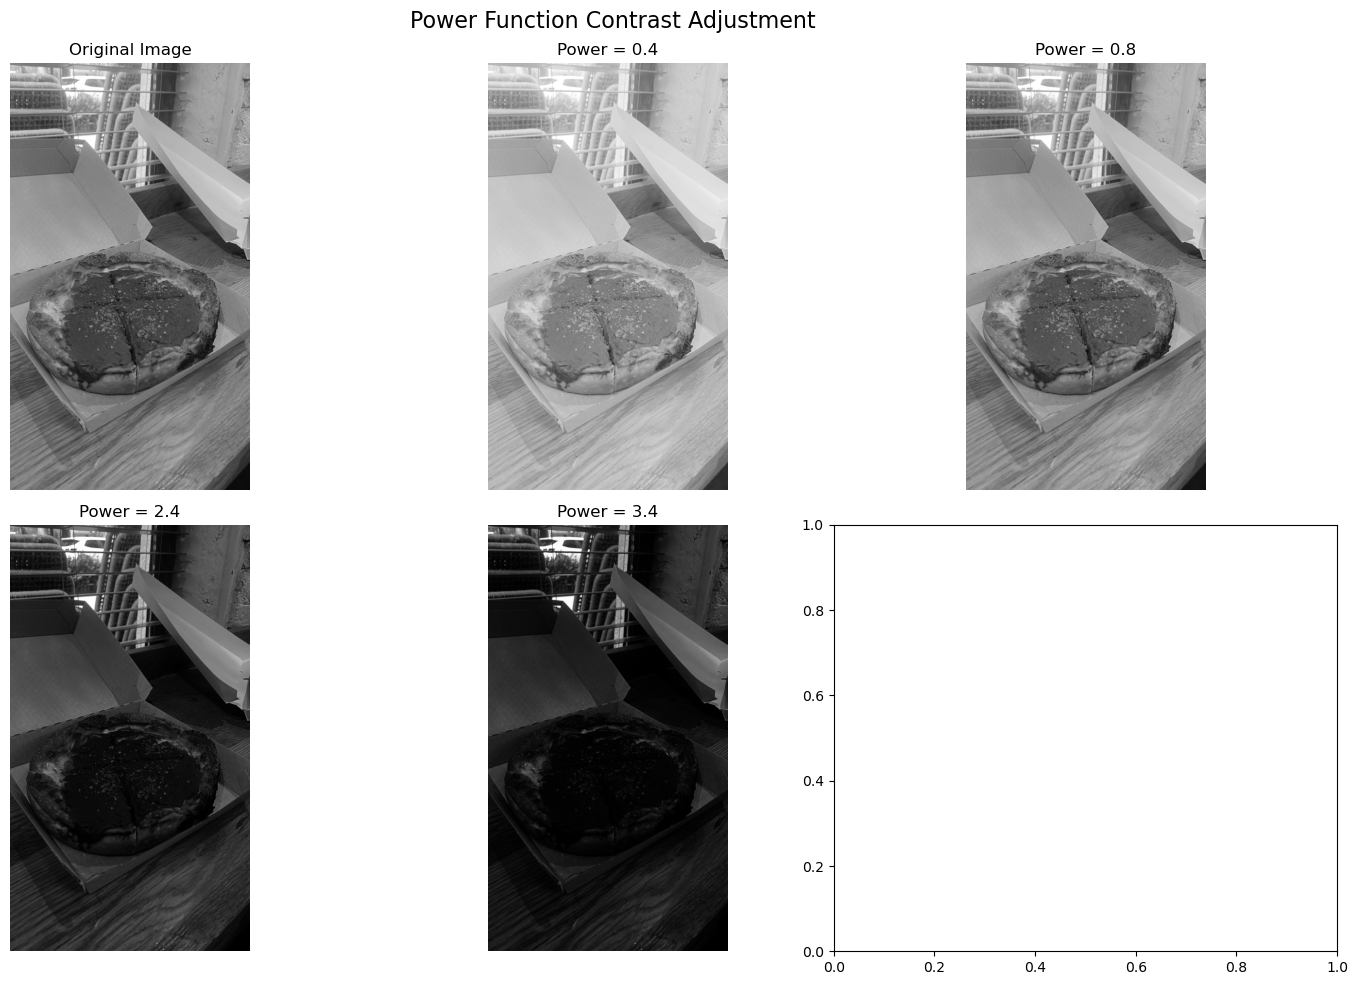

In [24]:
fig, img_axis = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Power Function Contrast Adjustment', fontsize=16)

img_axis[0, 0].imshow(image_float, cmap='gray')
img_axis[0, 0].set_title('Original Image')
img_axis[0, 0].axis('off')


for i, power in enumerate(power_levels, 1):
    adj_img = apply_power_function(image_float, power)
    row, col = divmod(i, 3)
    img_axis[row, col].imshow(adj_img, cmap='gray')
    img_axis[row, col].set_title(f'Power = {power}')
    img_axis[row, col].axis('off')

plt.tight_layout()
plt.show()

First two images show decreased contrast (power values < 1).Second two images show increased contrast (power values > 1).

## Part 3 – Image Transformations


### Image scaling is just one kind of transformation that we could use to modify an image. It belongs to a more general class of transformations called affine transformations. Do some research on affine transformations (Wikipedia is typically a good place to start). In this part, you will be required to write code to rotate the image around a given point. Note that results for any rotation vary significantly depending on the point used as the axis. You are allowed to use existing library functions for this. Your code should do the following:
1) Load the input image.
2) Use a library function to rotate the image around it’s top-left corner +45 degrees.
3) Use a library function to rotate the image around it’s top-left corner -45 degrees.
4) Use a library function to rotate the image around it’s center +45 degrees.
5) Use a library function to rotate the image around it’s center -45 degrees.

In [28]:
#load image
image3 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW2/Image3.jpeg")

In [29]:
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

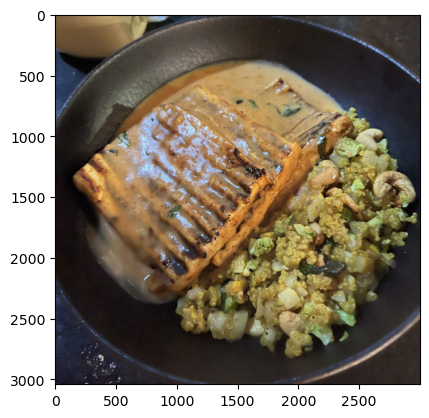

In [30]:
# Display the image
plt.imshow(image3_rgb)

In [31]:
height, width = image3_rgb.shape[:2]

In [32]:
matrixRot = cv2.getRotationMatrix2D((0, 0), 45, 1)
tl_clockwise_45 = cv2.warpAffine(image3_rgb, matrixRot, (width, height))
tl_clockwise_45_rgb = cv2.cvtColor(tl_clockwise_45, cv2.COLOR_BGR2RGB)

matrixRot = cv2.getRotationMatrix2D((0, 0), -45, 1)
tl_counterclockwise_45 = cv2.warpAffine(image3_rgb, matrixRot, (width, height))
tl_counterclockwise_45_rgb = cv2.cvtColor(tl_counterclockwise_45, cv2.COLOR_BGR2RGB)

matrixRot = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
center_clockwise_45 = cv2.warpAffine(image3_rgb, matrixRot, (width, height))
center_clockwise_45_rgb = cv2.cvtColor(center_clockwise_45, cv2.COLOR_BGR2RGB)

matrixRot = cv2.getRotationMatrix2D((width/2, height/2), -45, 1)
center_counterclockwise_45 = cv2.warpAffine(image3_rgb, matrixRot, (width, height))
center_counterclockwise_45_rgb = cv2.cvtColor(center_counterclockwise_45, cv2.COLOR_BGR2RGB)


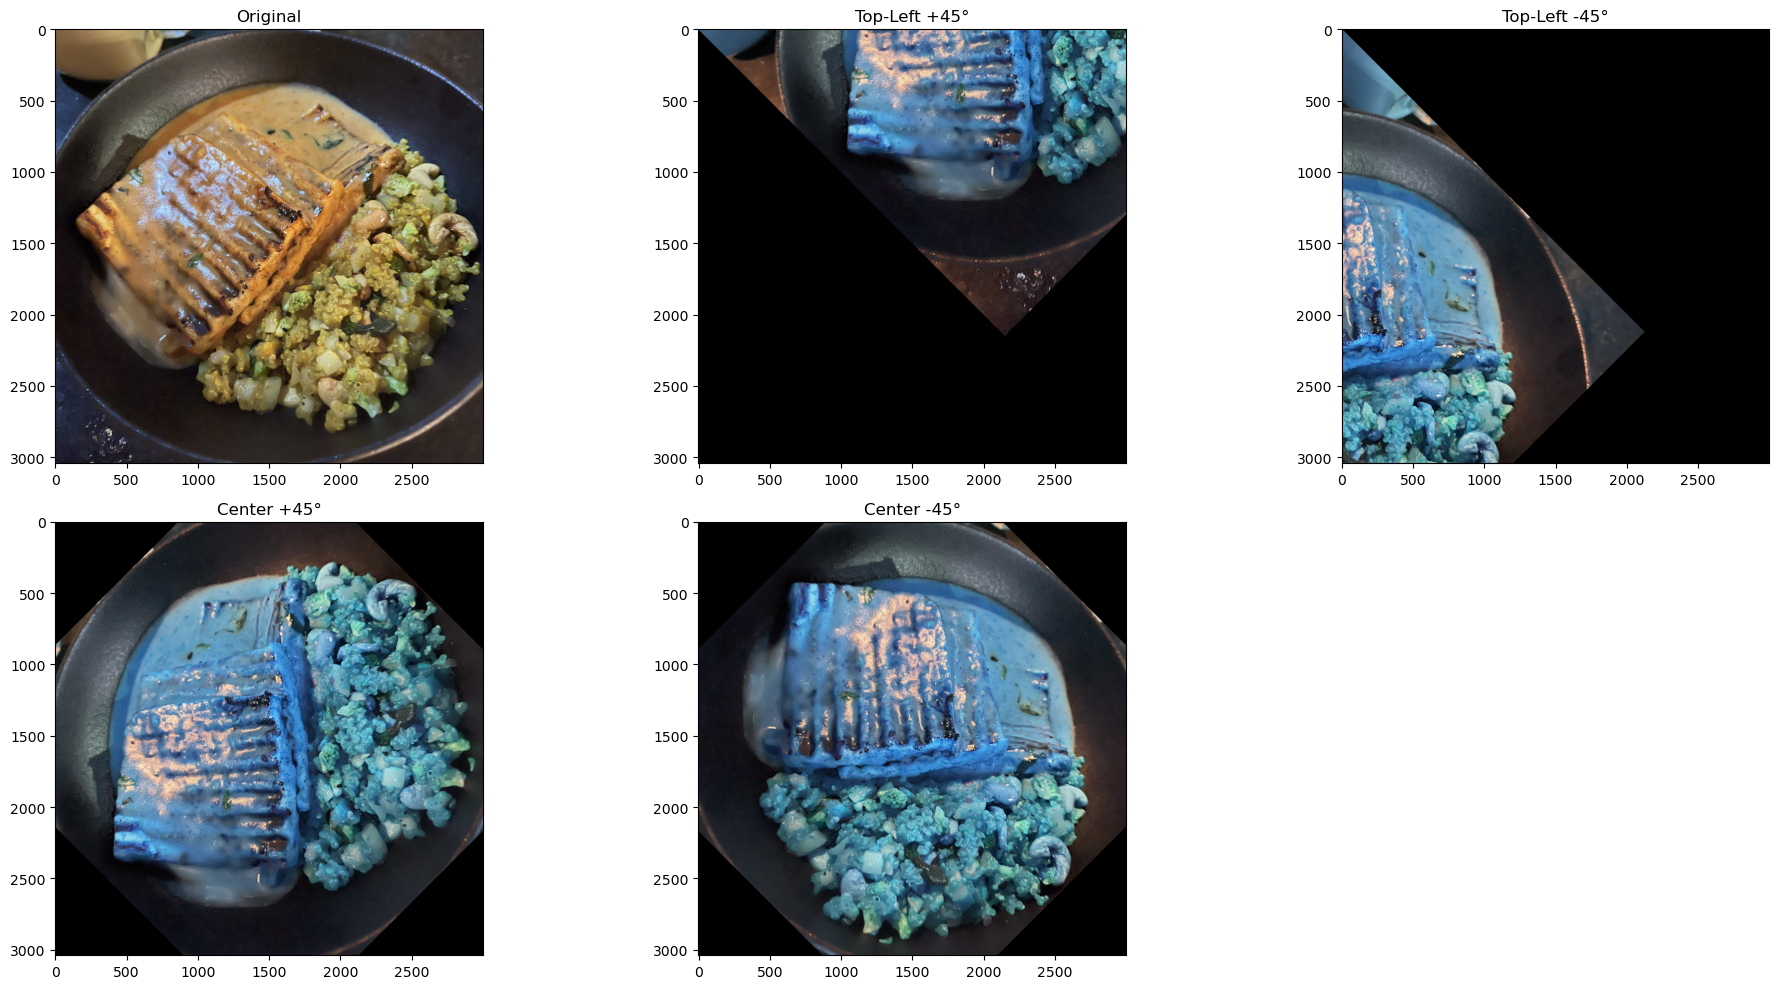

In [33]:
plt.figure(figsize=(20, 10))

plt.subplot(231), plt.imshow(image3_rgb), plt.title('Original')
plt.subplot(232), plt.imshow(tl_clockwise_45_rgb), plt.title('Top-Left +45°')
plt.subplot(233), plt.imshow(tl_counterclockwise_45_rgb), plt.title('Top-Left -45°')
plt.subplot(234), plt.imshow(center_clockwise_45_rgb), plt.title('Center +45°')
plt.subplot(235), plt.imshow(center_counterclockwise_45_rgb), plt.title('Center -45°')

plt.tight_layout()
plt.show()


Top-Left +45: Rotates clockwise from (0,0), shifting the image out of frame with black space in bottom-left and top left.

Top-Left -45: Rotates counterclockwise from (0,0), moving the top-right out of frame with black space in top-right and bottom-right.

Center +45: Rotates clockwise from the center,looks kinda like a diamond with corners cut off.

Center -45: Rotates counterclockwise from the center, similar to center +45 but in the opposite direction.